In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

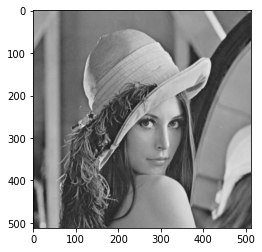

In [63]:
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)

In [64]:
def padding(before, size = 1):
    h, w  = before.shape
    after = np.zeros((h + size * 2, w + size * 2))
    # Fill Middle
    for r in range(size, size + h):
        for c in range(size, size + w):
            after[r][c] = before[r - size][c - size]
    
    # Fill Top/Bottom Edge
    for c in range(size, size + w):
        for r in range(0, size):
            after[r][c] = before[0][c - size]
        for r in range(h + size, h + size * 2):
            after[r][c] = before[h - 1][c - size]
    
    # Fill Left/Right Edge
    for r in range(size, size + h):
        for c in range(0, size):
            after[r][c] = before[r - size][0]
        for c in range(w + size, w + size * 2):
            after[r][c] = before[r - size][w - 1]

    # Fill Top-Left/Top-Right Corner
    for r in range(0, size):
        for c in range(0, size):
            after[r][c] = before[0][0]
        for c in range(w + size, w + size * 2):
            after[r][c] = before[0][w - 1]

    # Fill Bottom-Left/Bottom-Right Corner
    for r in range(h + size , h + size * 2):
        for c in range(0, size):
            after[r][c] = before[h - 1][0]
        for c in range(w + size, w + size * 2):
            after[r][c] = before[h - 1][w - 1]

    # Return
    return after

True

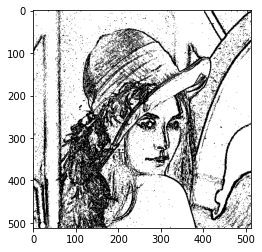

In [65]:
def Roberts(lena, thres = 12):
    h, w = lena.shape
    pad_lena = padding(lena, 1)
    after = np.zeros((h, w))
    for r in range(1, h + 1):
        for c in range(1, w + 1):
            r1 = -pad_lena[r][c] + pad_lena[r+1][c+1]
            r2 = pad_lena[r+1][c] - pad_lena[r][c+1]
            if (np.sqrt(r1**2 + r2**2) >= thres):
                after[r - 1][c - 1] = 0
            else:
                after[r - 1][c - 1] = 255
    return after

rona = Roberts(lena)
plt.imshow(rona, cmap='gray', vmin=0, vmax=255)
cv2.imwrite("lena-Roberts-12.bmp", rona)
cv2.imwrite("lena-Roberts-12.png", rona)

True

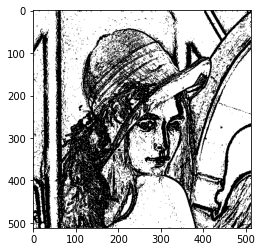

In [66]:
def Prewitt(lena, thres = 24):
    h, w = lena.shape
    pad_lena = padding(lena, 1)
    after = np.zeros((h, w))
    for r in range(1, h + 1):
        for c in range(1, w + 1):
            p1 = -(pad_lena[r-1][c-1] + pad_lena[r-1][c  ] + pad_lena[r-1][c+1]) + \
                  (pad_lena[r+1][c-1] + pad_lena[r+1][c  ] + pad_lena[r+1][c+1])
            p2 = -(pad_lena[r-1][c-1] + pad_lena[r  ][c-1] + pad_lena[r+1][c-1]) + \
                  (pad_lena[r-1][c+1] + pad_lena[r  ][c+1] + pad_lena[r+1][c+1])
            if (np.sqrt(p1**2 + p2**2) >= thres):
                after[r - 1][c - 1] = 0
            else:
                after[r - 1][c - 1] = 255
    return after

prna = Prewitt(lena)
plt.imshow(prna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite("lena-Prewitt-24.bmp", prna)
cv2.imwrite("lena-Prewitt-24.png", prna)

True

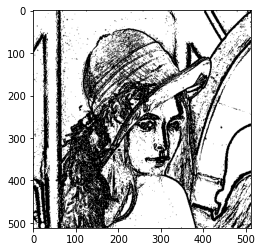

In [67]:
def Sobel(lena, thres = 38):
    h, w = lena.shape
    pad_lena = padding(lena, 1)
    after = np.zeros((h, w))
    for r in range(1, h + 1):
        for c in range(1, w + 1):
            p1 = -(pad_lena[r-1][c-1] + 2*pad_lena[r-1][c  ] + pad_lena[r-1][c+1]) + \
                  (pad_lena[r+1][c-1] + 2*pad_lena[r+1][c  ] + pad_lena[r+1][c+1])
            p2 = -(pad_lena[r-1][c-1] + 2*pad_lena[r  ][c-1] + pad_lena[r+1][c-1]) + \
                  (pad_lena[r-1][c+1] + 2*pad_lena[r  ][c+1] + pad_lena[r+1][c+1])
            if (np.sqrt(p1**2 + p2**2) >= thres):
                after[r - 1][c - 1] = 0
            else:
                after[r - 1][c - 1] = 255
    return after

sona = Sobel(lena)
plt.imshow(sona, cmap='gray', vmin=0, vmax=255)
cv2.imwrite("lena-Sobel-38.bmp", sona)
cv2.imwrite("lena-Sobel-38.png", sona)

True

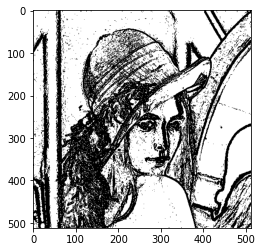

In [68]:
def FreiAndChen(lena, thres = 30):
    h, w = lena.shape
    pad_lena = padding(lena, 1)
    after = np.zeros((h, w))
    for r in range(1, h + 1):
        for c in range(1, w + 1):
            cof = np.sqrt(2)
            p1 = -(pad_lena[r-1][c-1] + cof*pad_lena[r-1][c  ] + pad_lena[r-1][c+1]) + \
                  (pad_lena[r+1][c-1] + cof*pad_lena[r+1][c  ] + pad_lena[r+1][c+1])
            p2 = -(pad_lena[r-1][c-1] + cof*pad_lena[r  ][c-1] + pad_lena[r+1][c-1]) + \
                  (pad_lena[r-1][c+1] + cof*pad_lena[r  ][c+1] + pad_lena[r+1][c+1])
            if (np.sqrt(p1**2 + p2**2) >= thres):
                after[r - 1][c - 1] = 0
            else:
                after[r - 1][c - 1] = 255
    return after

fcna = FreiAndChen(lena)
plt.imshow(fcna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite("lena-FreiAndChen-30.bmp", fcna)
cv2.imwrite("lena-FreiAndChen-30.png", fcna)

True

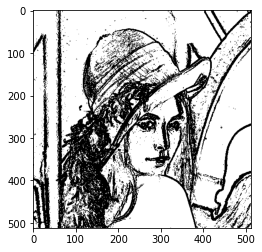

In [69]:
def Kirsch(lena, thres = 135):
    h, w = lena.shape
    pad_lena = padding(lena, 1)
    after = np.zeros((h, w))
    ofst = [
        (-1, -1), (-1, 0), (-1, 1),
        ( 0, -1),          ( 0, 1),
        (+1, -1), (+1, 0), (+1, 1),
    ]
    cofs = [
        [-3, -3,  5, -3,  5, -3, -3,  5],
        [-3,  5,  5, -3,  5, -3, -3, -3],
        [ 5,  5,  5, -3, -3, -3, -3, -3],
        [ 5,  5, -3,  5, -3, -3, -3, -3],
        [ 5, -3, -3,  5, -3,  5, -3, -3],
        [-3, -3, -3,  5, -3,  5,  5, -3],
        [-3, -3, -3, -3, -3,  5,  5,  5],
        [-3, -3, -3, -3,  5, -3,  5,  5],
    ]
    for r in range(1, h + 1):
        for c in range(1, w + 1):
            k = []
            
            for cof in cofs:
                tmp = 0
                for i in range(8):
                    ro, co = ofst[i]
                    tmp += cof[i] * pad_lena[r+ro][c+co]
                k.append(tmp)

            if (np.max(k) >= thres):
                after[r - 1][c - 1] = 0
            else:
                after[r - 1][c - 1] = 255
    return after

kina = Kirsch(lena)
plt.imshow(kina, cmap='gray', vmin=0, vmax=255)
cv2.imwrite("lena-Kirsch-135.bmp", kina)
cv2.imwrite("lena-Kirsch-135.png", kina)

True

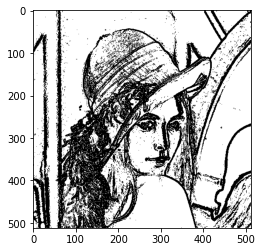

In [70]:
def Robinson(lena, thres = 43):
    h, w = lena.shape
    pad_lena = padding(lena, 1)
    after = np.zeros((h, w))
    ofst = [
        (-1, -1), (-1, 0), (-1, 1),
        ( 0, -1),          ( 0, 1),
        (+1, -1), (+1, 0), (+1, 1),
    ]
    cofs = [
        [-1,  0,  1, -2,  2, -1,  0,  1],
        [ 0,  1,  2, -1,  1, -2, -1,  0],
        [ 1,  2,  1,  0,  0, -1, -2, -1],
        [ 2,  1,  0,  1, -1,  0, -1, -2],
        [ 1,  0, -1,  2, -2,  1,  0, -1],
        [ 0, -1, -2,  1, -1,  2,  1,  0],
        [-1, -2, -1,  0,  0,  1,  2,  1],
        [-2, -1,  0, -1,  1,  0,  1,  2],
    ]
    for r in range(1, h + 1):
        for c in range(1, w + 1):
            k = []
            
            for cof in cofs:
                tmp = 0
                for i in range(8):
                    ro, co = ofst[i]
                    tmp += cof[i] * pad_lena[r+ro][c+co]
                k.append(tmp)

            if (np.max(k) >= thres):
                after[r - 1][c - 1] = 0
            else:
                after[r - 1][c - 1] = 255
    return after

robina = Robinson(lena)
plt.imshow(robina, cmap='gray', vmin=0, vmax=255)
cv2.imwrite("lena-Robinson-43.bmp", robina)
cv2.imwrite("lena-Robinson-43.png", robina)

True

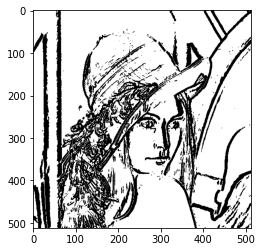

In [71]:
def NevatiaBabu(lena, thres = 12500):
    h, w = lena.shape
    pad_lena = padding(lena, 2)
    after = np.zeros((h, w))
    ofst = [
        (-2, -2), (-2, -1), (-1, 0), (-2, 1), (-2, 2),
        (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2),
        ( 0, -2), ( 0, -1), ( 0, 0), ( 0, 1), ( 0, 2),
        (+1, -2), (+1, -1), (+1, 0), (+1, 1), (+1, 2),
        (+2, -2), (+2, -1), (+1, 0), (+2, 1), (+2, 2)
    ]
    cofs = [
        [ 100,  100, 100, 100,  100,   100,  100, 100, 100,  100,     0,    0, 0,    0,    0,  -100, -100, -100, -100, -100,  -100, -100, -100, -100, -100],
        [ 100,  100, 100, 100,  100,   100,  100, 100,  78,  -32,   100,   92, 0,  -92, -100,    32,  -78, -100, -100, -100,  -100, -100, -100, -100, -100],
        [ 100,  100, 100,  32, -100,   100,  100,  92, -78, -100,   100,  100, 0, -100, -100,   100,   78,  -92, -100, -100,   100,  -32, -100, -100, -100],
        [-100, -100,   0, 100,  100,  -100, -100,   0, 100,  100,  -100, -100, 0,  100,  100,  -100, -100,    0,  100,  100,  -100, -100,    0,  100,  100],
        [-100,   32, 100, 100,  100,  -100,  -78,  92, 100,  100,  -100, -100, 0,  100,  100,  -100, -100,  -92,   78,  100,  -100, -100, -100,  -32, -100],
        [ 100,  100, 100, 100,  100,   -32,   78, 100, 100,  100,  -100,  -92, 0,   92,  100,  -100, -100, -100,  -78,   32,  -100, -100, -100, -100, -100],
    ]
    for r in range(2, h + 2):
        for c in range(2, w + 2):
            k = []
            
            for cof in cofs:
                tmp = 0
                for i in range(25):
                    ro, co = ofst[i]
                    tmp += cof[i] * pad_lena[r+ro][c+co]
                k.append(tmp)

            if (np.max(k) >= thres):
                after[r - 2][c - 2] = 0
            else:
                after[r - 2][c - 2] = 255
    return after

nbna = NevatiaBabu(lena)
plt.imshow(nbna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite("lena-NevatiaBabu-12500.bmp", nbna)
cv2.imwrite("lena-NevatiaBabu-12500.png", nbna)